# Challenge Kaggle - Visual In-Depth EDA – VinBigData Competition Data

    date:11/jan/2021


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pydicom
import os
import glob
import pickle
import pandas as pd
import csv
from pathlib import Path
from IPython.display import HTML
from os import listdir, mkdir

from IPython import display

import tensorflow as tf
from keras.models import load_model
from keras import layers 
from keras.layers import Concatenate,Input, Dense, Activation, ZeroPadding2D, \
BatchNormalization, Flatten, Conv2D 
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, \
GlobalAveragePooling2D 
from keras.models import Model, Sequential 
from keras.preprocessing import image 
from keras.utils import layer_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
path0 = "D:/kaggle2/"  

In [3]:
dados        = pd.read_csv(path0+"train.csv")
dados.head(15)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0


In [4]:
id_imagem = 'afb6230703512afc370f236e8fe98806'
dados.loc[(dados["image_id"] == id_imagem)]
aux = dados.loc[(dados["image_id"] == id_imagem)]
aux

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,1857.0,1607.0,2126.0,2036.0
2922,afb6230703512afc370f236e8fe98806,Lung Opacity,7,R9,486.0,1594.0,1002.0,1918.0
5084,afb6230703512afc370f236e8fe98806,ILD,5,R8,494.0,1385.0,1148.0,1919.0
14252,afb6230703512afc370f236e8fe98806,Aortic enlargement,0,R10,1331.0,762.0,1653.0,1081.0
15222,afb6230703512afc370f236e8fe98806,ILD,5,R10,488.0,1602.0,1093.0,1931.0
23978,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R10,1870.0,1591.0,2107.0,1990.0
29509,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,R9,486.0,1594.0,1002.0,1918.0
30852,afb6230703512afc370f236e8fe98806,Lung Opacity,7,R9,1857.0,1607.0,2126.0,2036.0
33461,afb6230703512afc370f236e8fe98806,ILD,5,R10,1870.0,1591.0,2107.0,1990.0
34540,afb6230703512afc370f236e8fe98806,Aortic enlargement,0,R8,1352.0,742.0,1648.0,1129.0


In [5]:
dados['class_name'].value_counts()

No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: class_name, dtype: int64

### Generate target values

In [6]:
id_img_unique = pd.unique(dados['image_id'])
print("Número de imagens únicas: ", len(id_img_unique))

Número de imagens únicas:  15000


In [7]:
id_class_unique = pd.unique(dados['class_id'])
numClasses = len(id_class_unique)
print("Número de classes: ", numClasses)
print("São elas: \n", sorted(id_class_unique))

Número de classes:  15
São elas: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [9]:
type(id_class_unique[0])

numpy.int64

In [8]:
lista = []
idx = 0
for id_img in id_img_unique:
    x = [0]*numClasses
    res = dados.loc[(dados['image_id'] == id_img)]
    for i in res['class_id']:
        x[i] = 1
    lista.append([id_img]+x)
    idx += 1
    if (idx%1000==0):
        print(idx)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [9]:
print(lista[4])

['063319de25ce7edb9b1c6b8881290140', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [10]:
colLabels = ['image_id'] + [str(x) for x in list(range(15))]
print(colLabels)

['image_id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


In [11]:
dataf = pd.DataFrame(lista, columns=colLabels)

In [12]:
dataf.to_csv(path0+'train-multiple-targets.csv')

In [13]:
dataf.head(10)

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,50a418190bc3fb1ef1633bf9678929b3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,21a10246a5ec7af151081d0cd6d65dc9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9a5094b2563a1ef3ff50dc5c7ff71345,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,051132a778e61a86eb147c7c6f564dfe,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,063319de25ce7edb9b1c6b8881290140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1c32170b4af4ce1a3030eb8167753b06,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6,0c7a38f293d5f5e4846aa4ca6db4daf1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
7,47ed17dcb2cbeec15182ed335a8b5a9e,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
8,d3637a1935a905b3c326af31389cb846,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
9,afb6230703512afc370f236e8fe98806,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0


In [14]:
os.chdir(path0+"/augmented/1.part")
files=glob.glob("*.pckl")

In [15]:
files[0][8:40]

'0007d316f756b3fa0baea2ff514ce945'

In [16]:
dataf.iloc[0:1,1:16]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
## Create label for augmented images
Y = np.zeros((len(files),15))
for i in range(len(files)):
  for j in range(len(dataf)): 
     if files[i][8:40] == dataf.iloc[j,0]:
        for k in range(15):    
          Y[i,k] = dataf.iloc[j][k+1]

In [18]:
Y

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [19]:
### Load data
f = open(files[0], 'rb')
X = pickle.load(f)

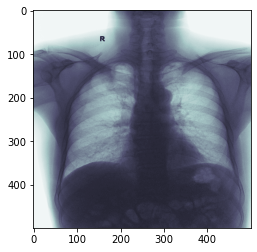

In [20]:
plt.imshow(X,cmap=plt.cm.bone)

In [21]:
### Load images
fig = plt.figure(figsize=(10,12))
X   = np.zeros((len(files),500,500))
for j in range(0,len(files)):
   f = open(files[j], 'rb')
   X[j] = pickle.load(f)


<Figure size 720x864 with 0 Axes>

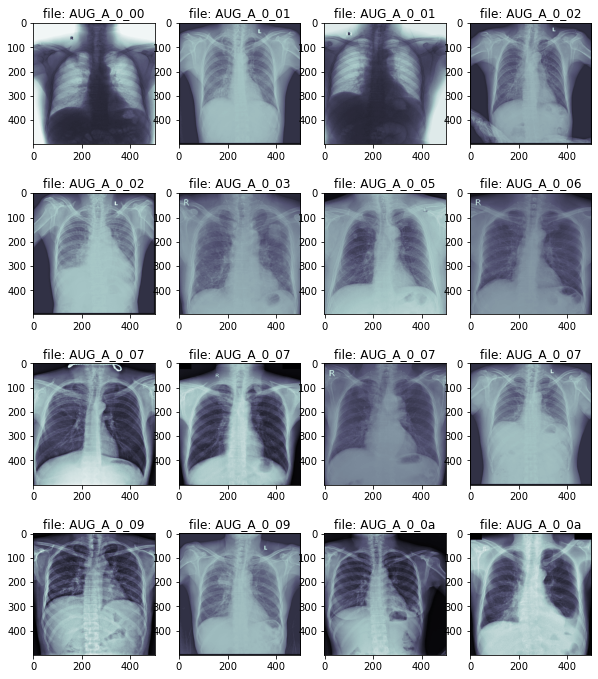

In [22]:
### Take a look on the data
fig = plt.figure(figsize=(10,12))
for j in range(0,16):
    fig.add_subplot(4,4,j+1).imshow(X[j],cmap=plt.cm.bone)
    plt.title("file: " + files[j][0:10])    

In [23]:
## construct tree channels
Xt = np.zeros((len(files),500,500,3)) #RGB
Xt[:,:,:,0] = X[:,:,:]
Xt[:,:,:,1] = X[:,:,:]
Xt[:,:,:,2] = X[:,:,:]

In [24]:
## Save images and labels in pckl format
Path     =  path0 + "/Data_pulmonary.pckl"
f = open(Path, 'wb')
pickle.dump([Xt,Y], f)
f.close()

In [25]:
f = open(Path, 'rb')
[Xt,Y] = pickle.load(f)

[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]


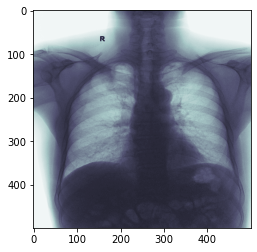

In [26]:
plt.imshow(Xt[0,:,:,1],cmap=plt.cm.bone)
print(Y[0])

### Construct the model

In [27]:
def KerasModel(input_shape):  
    NumClass = 15
    X_input  = Input(input_shape)
     
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(40, (3, 3), strides = (1, 1), name = 'conv0')(X)    
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    ##
    X = Conv2D(24, (3, 3), strides = (1, 1), name = 'conv1')(X)    
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)  
    ##
    
    ##
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv2')(X)    
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)  
    ##    

    ##   New layer
    X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv3')(X)    
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool3')(X)  
    ##    


    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(NumClass, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='KerasModel')
    
    return model 

In [29]:
# Construct the model
ModelPulm = KerasModel(Xt[0].shape) # input dimention
# Run the model
ModelPulm.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [ ]:
ModelPulm.summary()

Epoch 1/5
125/125 [==============================] - 391s 3s/step - loss: 0.6913 - accuracy: 0.2499
Epoch 2/5
125/125 [==============================] - 374s 3s/step - loss: 0.4321 - accuracy: 0.2483
Epoch 3/5
125/125 [==============================] - 384s 3s/step - loss: 0.3979 - accuracy: 0.2527
Epoch 4/5
125/125 [==============================] - 382s 3s/step - loss: 0.3574 - accuracy: 0.2794
Epoch 5/5
125/125 [==============================] - 382s 3s/step - loss: 0.3045 - accuracy: 0.2698


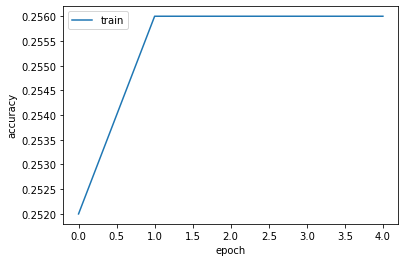

In [30]:
history = ModelPulm.fit( x=Xt, y=Y, batch_size=2**6, epochs=5) ## batch = 2**6
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

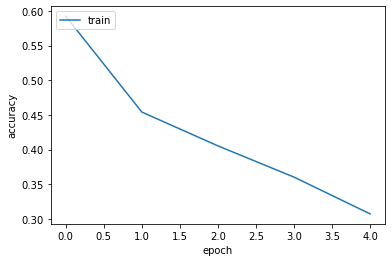

In [31]:
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()